In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

## Description

customer_id : id of the credit card holder

balance_account : balance amount left in the account to make purchases at the end of the 6-month period

purchases_amount : amount of purchases made from account

paid_advance : number of transactions made with “Cash in Advance” method

full_purchases : maximum purchase amount done in full payment

balance_frequency_update : how frequently the balance has been updated, score between 0 and 1 (1 = frequently - updated, 0 = not frequently updated)

installments : amount of purchases done in installments

purchases_frequency : how frequently the purchases are being made, score between 0 and 1 (1 = frequently - - purchased, 0 = not frequently purchased)

full_purchases_frequency : how frequently purchases are happening in full payment (1 = frequently purchased, - 0 = not frequently purchased)

purchases_installments_frequency : how frequently purchases in installments are being done (1 = frequently - done, 0 = not frequently done)

cash_advance_frequency : how frequently the cash in advance being paid

nr_cash_advances : cash in advance given by the user

nr_purchases : number of purchase transactions made

credit_limit : limit of credit card for user

fixed_rate_period : duration of fixed interest rate of credit card service for user (in months)

payments : amount of payment done by user

min_payments : minimum amount of payments made by user

full_payment_prc : percent of full payment paid by user

In [4]:
pd.set_option('display.max_columns', None)

### Read the data

In [2]:
df = pd.read_csv('card_transactions.csv')
df.head()

customer_id  balance_account  purchases_amount  paid_advance  \
0  tGEg8fT2eCgVxdwS         9.298409            107.60      0.000000   
1  stEDu20sSKOXomjg        52.666422            150.30      0.000000   
2  CEB2blrN3b88GsRe      1360.795674              0.00    462.861443   
3  0N0eBl8ySaZThxKE      2021.641161            363.18      0.000000   
4  6NLauoHUwtwOv4Wy        22.322374             95.00   1162.045833   

   full_purchases  balance_frequency_update  installments  \
0            0.00                  0.909091         107.6   
1            0.00                  1.000000         150.3   
2            0.00                  1.000000           0.0   
3          363.18                  1.000000           0.0   
4           95.00                  0.363636           0.0   

   purchases_frequency  full_purchases_frequency  \
0             0.909091                  0.000000   
1             1.000000                  0.000000   
2             0.000000                  0.000000   
3             1.000000                  1.000000   
4             0.083333                  0.083333   

   purchases_installments_frequency  cash_advance_frequency  nr_cash_advances  \
0                          0.818182                0.000000                 0   
1                          0.833333                0.000000                 0   
2                          0.000000                0.272727                 6   
3                          0.000000                0.000000                 0   
4                          0.000000                0.166667                 3   

   nr_purchases  credit_limit  fixed_rate_period     payments  min_payments  \
0            10        1000.0                 11    89.868853     89.711672   
1             6        1000.0                  6    54.722514     82.955180   
2             0        1500.0                 11   303.031979    443.781316   
3            13        2000.0                 12   704.240770    795.859808   
4             1        2500.0                 12  4094.261427     40.142262   

   full_payment_prc  
0          0.428571  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000

In [6]:
df.shape

(8500, 18)

In [7]:
df.nunique()

customer_id                         8500
balance_account                     8425
purchases_amount                    5896
paid_advance                        4097
full_purchases                      3826
balance_frequency_update              43
installments                        4240
purchases_frequency                   47
full_purchases_frequency              47
purchases_installments_frequency      47
cash_advance_frequency                54
nr_cash_advances                      63
nr_purchases                         172
credit_limit                         203
fixed_rate_period                      7
payments                            8274
min_payments                        8201
full_payment_prc                      47
dtype: int64

In [7]:
df.isnull().sum()

customer_id                           0
balance_account                       0
purchases_amount                      0
paid_advance                          0
full_purchases                        0
balance_frequency_update              0
installments                          0
purchases_frequency                   0
full_purchases_frequency              0
purchases_installments_frequency      0
cash_advance_frequency                0
nr_cash_advances                      0
nr_purchases                          0
credit_limit                          1
fixed_rate_period                     0
payments                              0
min_payments                        298
full_payment_prc                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 18 columns):
customer_id                         8500 non-null object
balance_account                     8500 non-null float64
purchases_amount                    8500 non-null float64
paid_advance                        8500 non-null float64
full_purchases                      8500 non-null float64
balance_frequency_update            8500 non-null float64
installments                        8500 non-null float64
purchases_frequency                 8500 non-null float64
full_purchases_frequency            8500 non-null float64
purchases_installments_frequency    8500 non-null float64
cash_advance_frequency              8500 non-null float64
nr_cash_advances                    8500 non-null int64
nr_purchases                        8500 non-null int64
credit_limit                        8499 non-null float64
fixed_rate_period                   8500 non-null int64
payments                      

### Impute the nans

In [3]:
df['credit_limit'].fillna(df['credit_limit'].median(),inplace=True)

df['credit_limit'].count()


df['min_payments'].median()
df['min_payments'].fillna(df['min_payments'].median(),inplace=True)

In [10]:
df.isnull().sum()

customer_id                         0
balance_account                     0
purchases_amount                    0
paid_advance                        0
full_purchases                      0
balance_frequency_update            0
installments                        0
purchases_frequency                 0
full_purchases_frequency            0
purchases_installments_frequency    0
cash_advance_frequency              0
nr_cash_advances                    0
nr_purchases                        0
credit_limit                        0
fixed_rate_period                   0
payments                            0
min_payments                        0
full_payment_prc                    0
dtype: int64

### Exploring the data

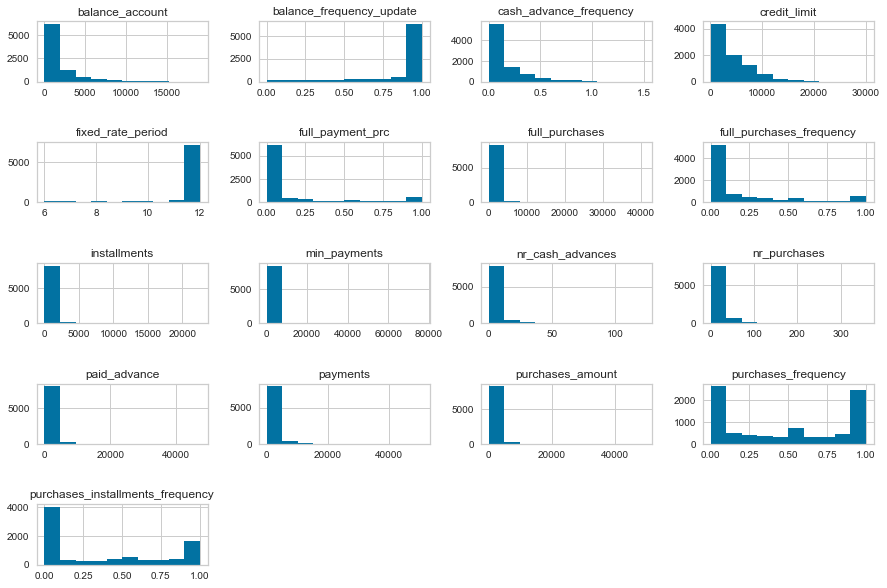

In [10]:
df.hist(figsize = (15,10))
plt.subplots_adjust(hspace=1) 

In [236]:
df["min_payments"].unique()

array([ 89.71167,  82.95518, 443.78132, ..., 150.50025, 497.40885,
       437.07565])

In [237]:
df.dtypes

customer_id                          object
balance_account                     float64
purchases_amount                    float64
paid_advance                        float64
full_purchases                      float64
balance_frequency_update            float64
installments                        float64
purchases_frequency                 float64
full_purchases_frequency            float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
nr_cash_advances                      int64
nr_purchases                          int64
credit_limit                        float64
fixed_rate_period                     int64
payments                            float64
min_payments                        float64
full_payment_prc                    float64
dtype: object

In [238]:
df.describe()

balance_account  purchases_amount  paid_advance  full_purchases  \
count      8500.000000       8500.000000   8500.000000     8500.000000   
mean       1565.941403        999.561312    973.508540      588.165365   
std        2090.513302       2154.189460   2078.539061     1669.466184   
min           0.000000          0.000000      0.000000        0.000000   
25%         126.318369         39.000000      0.000000        0.000000   
50%         869.046468        360.000000      0.000000       37.400000   
75%        2053.674410       1105.897500   1113.726110      570.410000   
max       19043.138560      49039.570000  47137.211760    40761.250000   

       balance_frequency_update  installments  purchases_frequency  \
count               8500.000000   8500.000000          8500.000000   
mean                   0.876272    411.708492             0.489383   
std                    0.237517    910.142440             0.401075   
min                    0.000000      0.000000             0.000000   
25%                    0.875000      0.000000             0.083333   
50%                    1.000000     89.000000             0.500000   
75%                    1.000000    466.725000             0.916667   
max                    1.000000  22500.000000             1.000000   

       full_purchases_frequency  purchases_installments_frequency  \
count               8500.000000                       8500.000000   
mean                   0.201940                          0.363796   
std                    0.297756                          0.397162   
min                    0.000000                          0.000000   
25%                    0.000000                          0.000000   
50%                    0.083333                          0.166667   
75%                    0.285714                          0.750000   
max                    1.000000                          1.000000   

       cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
count             8500.000000       8500.000000   8500.000000   8500.000000   
mean                 0.135288          3.253647     14.677059   4485.673898   
std                  0.200892          6.854883     25.001561   3629.626271   
min                  0.000000          0.000000      0.000000     50.000000   
25%                  0.000000          0.000000      1.000000   1500.000000   
50%                  0.000000          0.000000      7.000000   3000.000000   
75%                  0.222222          4.000000     17.000000   6500.000000   
max                  1.500000        123.000000    358.000000  30000.000000   

       fixed_rate_period      payments  min_payments  full_payment_prc  
count        8500.000000   8500.000000   8500.000000       8500.000000  
mean           11.516118   1721.250989    846.130177          0.152587  
std             1.339121   2893.200899   2349.256982          0.291505  
min             6.000000      0.000000      0.019163          0.000000  
25%            12.000000    381.893717    170.483712          0.000000  
50%            12.000000    851.146953    310.399040          0.000000  
75%            12.000000   1897.014052    787.173152          0.142857  
max            12.000000  50721.483360  76406.207520          1.000000

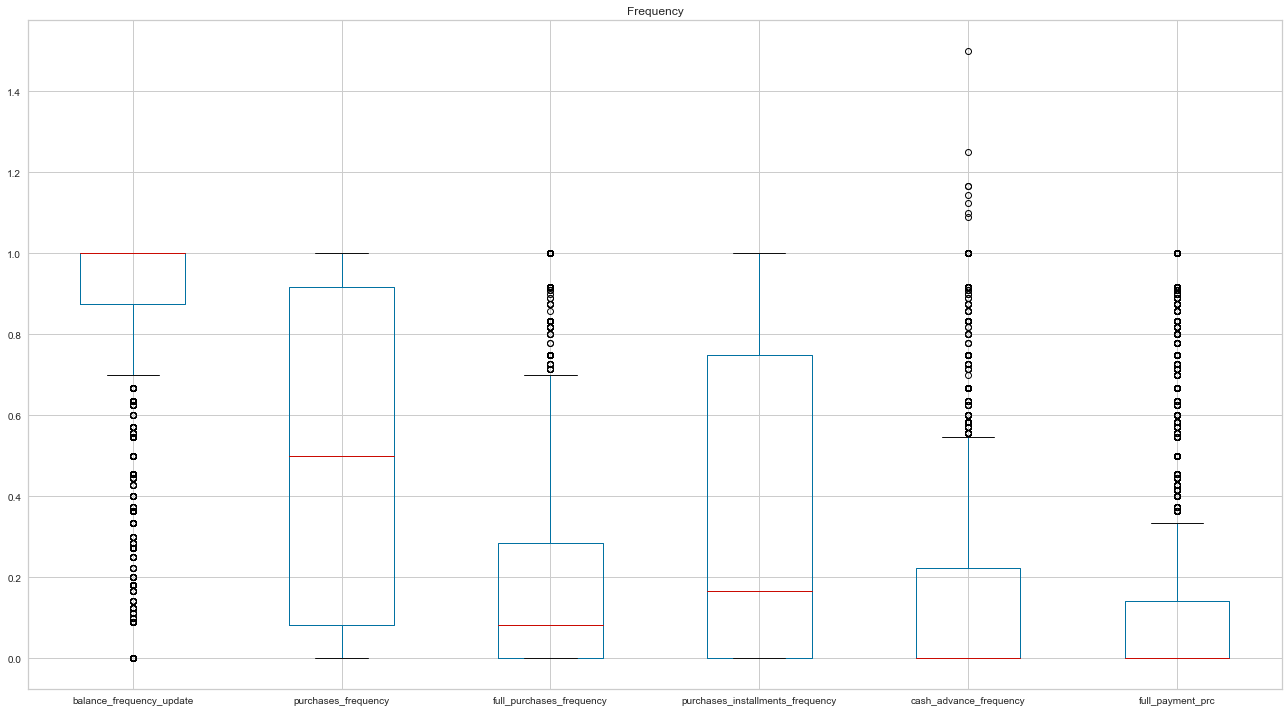

In [239]:
df[['balance_frequency_update',
 'purchases_frequency',
 'full_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
'full_payment_prc']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

In [240]:
df[['balance_account',
 'purchases_amount',
 'paid_advance',
 'installments',
 'full_purchases',
 'credit_limit',
 'payments',
 'min_payments'
]].plot.box(figsize=(18,10),title='Distribution',legend=True);
plt.tight_layout()

In [241]:
#Lets take a look at how the  variables are correlated
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True);
plt.title('Correlations', size = 28);

In [67]:
plt.figure(figsize=(12,10))
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["cluster"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

installments                        0.549170
purchases_frequency                 0.813355
purchases_installments_frequency    0.806705
nr_purchases                        0.512132
cluster                             1.000000
Name: cluster, dtype: float64

<Figure size 864x720 with 0 Axes>

In [349]:
sns.heatmap(df.corr(),
            xticklabels=data.columns,
            yticklabels=data.columns
           )

In [242]:
# Distribution of int64 variables
fig, axes = plt.subplots(nrows=3, ncols=1)
ax0, ax1, ax2 = axes.flatten()

ax0.hist(df['nr_cash_advances'], 65, histtype='bar', stacked=True)
ax0.set_title('nr_cash_advances')

ax1.hist(df['nr_purchases'], 173, histtype='bar', stacked=True)
ax1.set_title('nr_purchases')

ax2.hist(df['fixed_rate_period'], 7, histtype='bar', stacked=True)
ax2.set_title('fixed_rate_period')

fig.tight_layout()
plt.show()

### Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

In [5]:
df=df.drop(['customer_id'],1)

In [245]:
df.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc'],
      dtype='object')

In [6]:
sc = MinMaxScaler(feature_range=(0, 1))
df_columns=df.columns
# Fit on the data and transform
df_sc=sc.fit_transform(df.values)

In [7]:
df_sc = pd.DataFrame(df_sc,columns=df_columns)

In [8]:
df_sc

balance_account  purchases_amount  paid_advance  full_purchases  \
0            0.000488          0.002194      0.000000        0.000000   
1            0.002766          0.003065      0.000000        0.000000   
2            0.071459          0.000000      0.009819        0.000000   
3            0.106161          0.007406      0.000000        0.008910   
4            0.001172          0.001937      0.024652        0.002331   
...               ...               ...           ...             ...   
8495         0.059213          0.000000      0.005751        0.000000   
8496         0.001124          0.003053      0.000000        0.000000   
8497         0.000000          0.000000      0.005386        0.000000   
8498         0.086456          0.021357      0.003111        0.025695   
8499         0.097730          0.035727      0.000000        0.034768   

      balance_frequency_update  installments  purchases_frequency  \
0                     0.909091      0.004782             0.909091   
1                     1.000000      0.006680             1.000000   
2                     1.000000      0.000000             0.000000   
3                     1.000000      0.000000             1.000000   
4                     0.363636      0.000000             0.083333   
...                        ...           ...                  ...   
8495                  1.000000      0.000000             0.000000   
8496                  1.000000      0.006654             0.916667   
8497                  0.000000      0.000000             0.000000   
8498                  1.000000      0.000000             0.583333   
8499                  1.000000      0.014884             0.916667   

      full_purchases_frequency  purchases_installments_frequency  \
0                     0.000000                          0.818182   
1                     0.000000                          0.833333   
2                     0.000000                          0.000000   
3                     1.000000                          0.000000   
4                     0.083333                          0.000000   
...                        ...                               ...   
8495                  0.000000                          0.000000   
8496                  0.000000                          0.916667   
8497                  0.000000                          0.000000   
8498                  0.583333                          0.000000   
8499                  0.583333                          0.666667   

      cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                   0.000000           0.00000      0.027933      0.031720   
1                   0.000000           0.00000      0.016760      0.031720   
2                   0.181818           0.04878      0.000000      0.048414   
3                   0.000000           0.00000      0.036313      0.065109   
4                   0.111111           0.02439      0.002793      0.081803   
...                      ...               ...           ...           ...   
8495                0.055555           0.00813      0.000000      0.282137   
8496                0.000000           0.00000      0.030726      0.048414   
8497                0.074074           0.00813      0.000000      0.015025   
8498                0.111111           0.01626      0.142458      0.098497   
8499                0.000000           0.00000      0.089385      0.115192   

      fixed_rate_period  payments  min_payments  full_payment_prc  
0              0.833333  0.001772      0.001174          0.428571  
1              0.000000  0.001079      0.001085          0.000000  
2              0.833333  0.005974      0.005808          0.000000  
3              1.000000  0.013884      0.010416          0.000000  
4              1.000000  0.080720      0.000525          0.000000  
...                 ...       ...           ...               ...  
8495           1.000000  0.013059      0.003406          0.000000  
84

### Checking, delete ouliers

In [9]:
IsF = IsolationForest(n_estimators = 100, 
                        max_samples = 200,
                        contamination = "auto", 
                        behaviour= "new", 
                        random_state = 0).fit(df_sc)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [10]:
inlier_isf = IsF.predict(df_sc)

In [17]:
inlier=inlier_isf[inlier_isf==1]

In [201]:
inlier

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
df['out']=inlier_isf

In [12]:
df['out'].value_counts()

 1    7538
-1     962
Name: out, dtype: int64

In [13]:
df=df[df['out']==1]

In [14]:
df_sc['out']=inlier_isf

In [15]:
df_sc['out'].value_counts()

 1    7538
-1     962
Name: out, dtype: int64

In [16]:
df_sc=df_sc[df_sc['out']==1]


In [17]:
df_sc = df_sc.drop(['out'],1)

In [18]:
df = df.drop(['out'],1)

In [19]:
df.shape

(7538, 17)

In [27]:
df_sc.shape

(7538, 17)

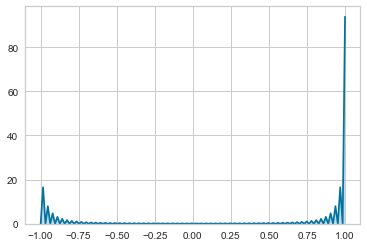

In [261]:
sns.kdeplot(inlier_isf, shade=True)

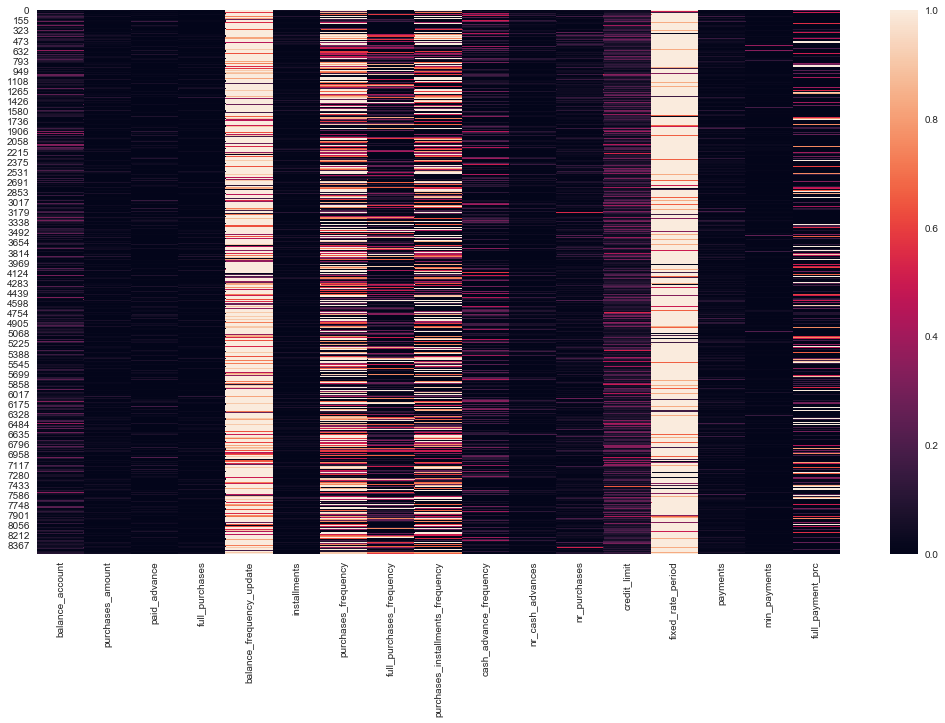

In [262]:
fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
sns.heatmap(df_sc, ax=ax)

In [70]:
df.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'cluster'],
      dtype='object')

### PCA analysis

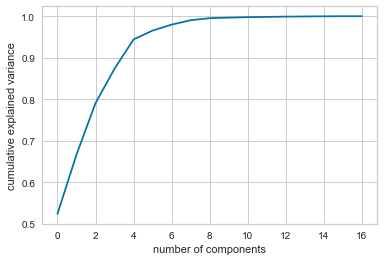

In [263]:
df_sc_pca = PCA(n_components =17).fit(df_sc)
plt.plot(np.cumsum(df_sc_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [264]:
sum(df_sc_pca.explained_variance_ratio_) #100% explained

1.0000000000000002

In [265]:
var_ratio ={}
for n in range(1,17):
    pc=PCA(n_components=n)
    df_pca=pc.fit(df_sc)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [266]:
var_ratio

{1: 0.523561933678711,
 2: 0.6662665458901303,
 3: 0.79044656801084,
 4: 0.8735473052757854,
 5: 0.9440667180829941,
 6: 0.9653634722298722,
 7: 0.979663387008259,
 8: 0.9903144015806246,
 9: 0.9952009335629662,
 10: 0.9965516638358409,
 11: 0.9976041096405424,
 12: 0.9983403375226945,
 13: 0.9989507903498938,
 14: 0.9993809843299314,
 15: 0.9997354819024156,
 16: 0.9999999765552537}

In [20]:
pc5=PCA(0.9).fit(df_sc) #also "n_components=0.9" would give 90% of variance

In [21]:
features=pc5.fit_transform(df_sc)

In [22]:
features.shape

(7538, 5)

In [23]:

df_f = pd.DataFrame(features)

In [24]:
df_f.columns=['F_1','F_2','F_3','F_4','F_5']

In [31]:
df_f['cluster']=clusters

In [32]:
df_f

F_1       F_2       F_3       F_4       F_5  cluster
0     0.649216 -0.323400 -0.002903 -0.103753  0.099869        3
1     0.626680 -0.267756 -0.319372  0.277982  0.895667        3
2    -0.610126  0.004513 -0.133358 -0.133021  0.132118        1
3     0.282726  0.899536  0.340577  0.251172  0.034888        2
4    -0.586080 -0.177769  0.137997  0.343054 -0.212560        0
...        ...       ...       ...       ...       ...      ...
7533 -0.592311  0.044286 -0.117543 -0.163872 -0.055993        1
7534  0.681778 -0.195056 -0.268020 -0.070089 -0.051366        3
7535 -0.703886 -0.499804  0.250715  0.708967  0.150711        0
7536 -0.082656  0.548432  0.139355  0.072226  0.007903        2
7537  0.591402  0.382273 -0.061148  0.149144 -0.029510        2

[7538 rows x 6 columns]

In [26]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc5.explained_variance_ratio_,index=['F_'+ str(i+1) for i in range(5)])

F_1    0.523562
F_2    0.142705
F_3    0.124180
F_4    0.083101
F_5    0.070519
dtype: float64

### TSNE

In [27]:
n_components = 2
perplexity = 10
palette_cl = sns.color_palette("bright", 8)
palette_if = sns.color_palette("bright", 2)

In [59]:
features.shape

(7538, 5)

In [282]:
tsne = TSNE(n_components=n_components, random_state=0, perplexity=perplexity)
X_embedded = tsne.fit_transform(features)

In [330]:
 tsne_df = pd.DataFrame({'X':X_embedded[:,0],
                        'Y':X_embedded[:,1]})

In [326]:
sns.scatterplot(x="X", y="Y", data=tsne_df, hue=df_features["cluster"], legend='full') 

In [336]:
tsne_df.shape

(7538, 2)

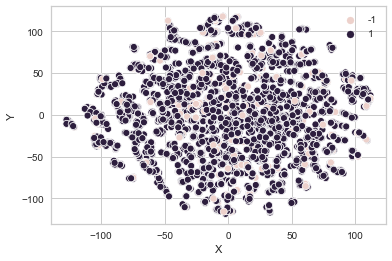

In [338]:
sns.scatterplot(x="X", y="Y", data=tsne_df, hue=inlier_isf[1:7539], legend='full')#outliers

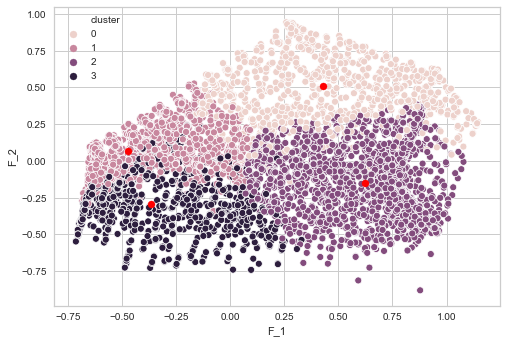

In [62]:
sns.scatterplot('F_1', 'F_2',data=df_f, hue='cluster')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

### Random Forest for feature  selection

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [33]:
X_train, y_train = train_test_split(df, test_size=0.4, random_state=0)

In [34]:
# Train the classifier
#clf.fit(X_train,y_train)

### Hierarchical clustering

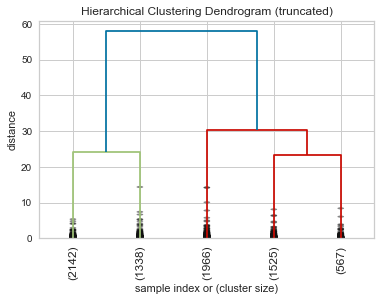

In [293]:
# Hierarchical clustering for the same dataset
# creating a dataset for hierarchical clustering
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
#creating the linkage matrix
H_cluster = linkage(df_sc,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [37]:
df_sc['cluster']=clusters

In [344]:
plt.figure(figsize=(10, 8))
plt.scatter(df_sc.iloc[:,0], df_sc.iloc[:,1],c=df_sc.cluster, cmap='prism')  # plot points with cluster dependent colors
plt.title('Clutering')
plt.show()

### K-Means cluster selection

In [28]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


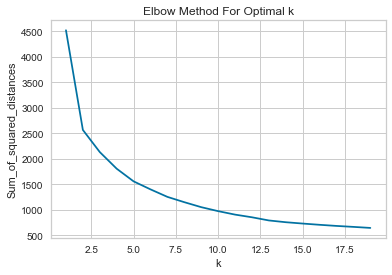

In [295]:
 from scipy.spatial.distance import cdist

X = np.array(df_sc)
Sum_of_squared_distances = []
K = range(1, 20)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

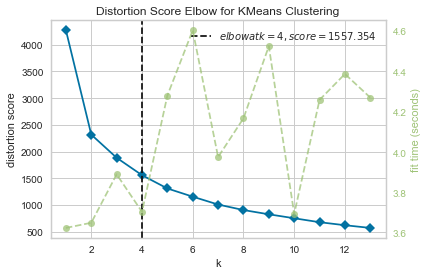

''

In [298]:
# Instantiate the clustering model and visualizer
model = KMeans(
    n_clusters=12,
    init='k-means++',
    n_init=10,
    max_iter=200,
    tol=0.0001,
    precompute_distances='auto',
    verbose=2,
    random_state=None,
    copy_x=True,
    n_jobs=-1,
    algorithm='auto',
)
visualizer = KElbowVisualizer(model, k=(1,14))

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()                   # Finalize and render the figure
; 

### K-means

In [29]:
kmeans = KMeans(n_clusters=4).fit(features)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.47196088  0.06458697 -0.0864125  -0.10269451  0.029657  ]
 [ 0.62381842 -0.15317522 -0.12710236 -0.02285031  0.00797952]
 [ 0.43109322  0.51249049  0.29792457  0.08599264  0.01946251]
 [-0.36813974 -0.29596892  0.26122329  0.26638322 -0.11799232]]


In [30]:
clusters = kmeans.fit_predict(features)
clusters

array([3, 3, 1, ..., 0, 2, 2])

In [319]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

score = metrics.silhouette_score (features, clusters, metric='euclidean')
print ("For n_clusters = {}, silhouette score is {})".format('4', score))

For n_clusters = 4, silhouette score is 0.40050234704751875)


In [321]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score
score={}
score_c={}
for n in range(2,20):
    km_score=KMeans(n_clusters=n)
    km_score.fit(features)
    score_c[n]=calinski_harabaz_score(features,km_score.labels_)
    score[n]=silhouette_score(features,km_score.labels_)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function 

In [313]:
pd.Series(score_c).plot()

In [324]:
scores

[0.44089920566129825,
 0.43344120022231225,
 0.40050234704751875,
 0.4053766275361308,
 0.424442726498921,
 0.41577091981839476,
 0.42655554911787075,
 0.43566787312417027,
 0.42955156753845786,
 0.4358193518113652,
 0.43297872719112684,
 0.4437847066123389,
 0.447342562044726,
 0.4390056435035182,
 0.44337025866863256,
 0.44438778105410837,
 0.4444940906983084,
 0.442422855223403,
 0.42313182449748493]

In [347]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()  

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


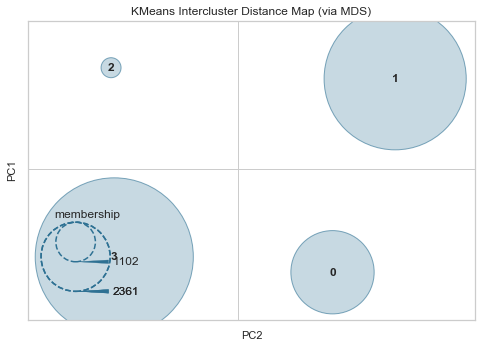

In [61]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = InterclusterDistance(model)

visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

None

In [85]:
def plot_3D(data_3D, labels=None, **kwargs):
    fig_ = plt.figure(figsize=(10,8))
    ax = Axes3D(fig_)
    ax.scatter(data_3D.iloc[:, 0], data_3D.iloc[:, 1], data_3D.iloc[:, 2], c=labels, **kwargs) 
    return ax

In [83]:
def kmeans_clusters_3D(data_, n_clusters):
    km_ = KMeans(n_clusters)
    km_.fit(data_)
    plot_3D(data_, km_.labels_.astype(float))
    
    return

In [84]:
def plot_clusters_3D(data_, centers_, labels=None):
    fig = plt.figure(figsize=(10,10))
    ax3d = Axes3D(fig)
    ax3d.scatter(data_.iloc[:, 0], data_.iloc[:, 1], data_.iloc[:, 2], c = labels, alpha=0.2)
    ax3d.scatter(centers_.loc[0], centers_.loc[0], centers_.loc[0], marker = "*", c = 'red', s=300, alpha=1)
    ax3d.set_xlabel(cols[0])
    ax3d.set_ylabel(cols[1])
    ax3d.set_zlabel(cols[2])

In [87]:
df_sc.columns

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments', 'purchases_frequency',
       'full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances', 'nr_purchases',
       'credit_limit', 'fixed_rate_period', 'payments', 'min_payments',
       'full_payment_prc', 'cluster'],
      dtype='object')

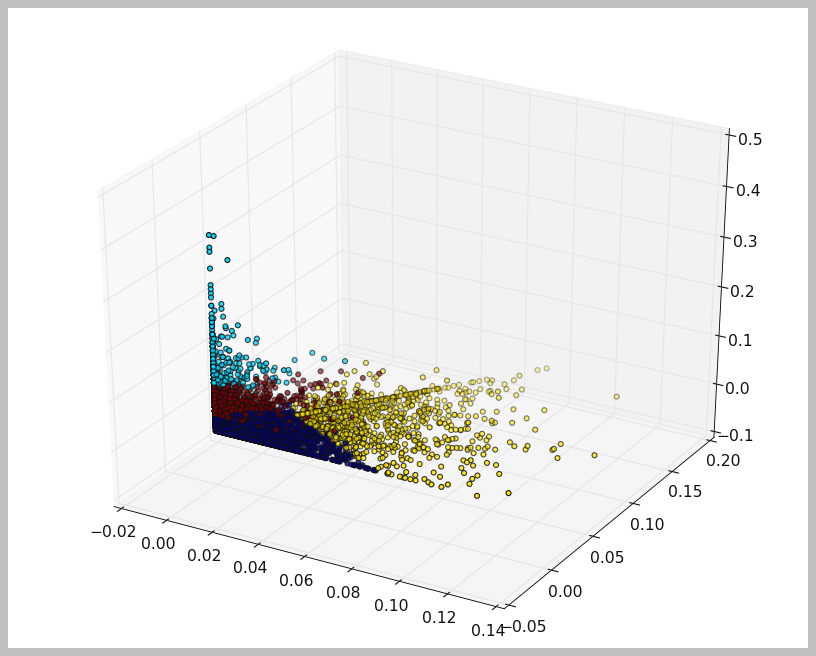

In [124]:
plt.style.use('classic')
plt.rcParams["figure.figsize"] = (12, 8) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size
kmeans_clusters_3D(df_sc[['purchases_amount', 'installments', 'nr_cash_advances']], 4)
None

In [45]:
df_f.head()

F_1       F_2       F_3       F_4       F_5  cluster
0  0.649216 -0.323400 -0.002903 -0.103753  0.099869        2
1  0.626680 -0.267756 -0.319372  0.277982  0.895667        2
2 -0.610126  0.004513 -0.133358 -0.133021  0.132118        1
3  0.282726  0.899536  0.340577  0.251172  0.034888        0
4 -0.586080 -0.177769  0.137997  0.343054 -0.212560        3

C:\Users\ooles\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ooles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ooles\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


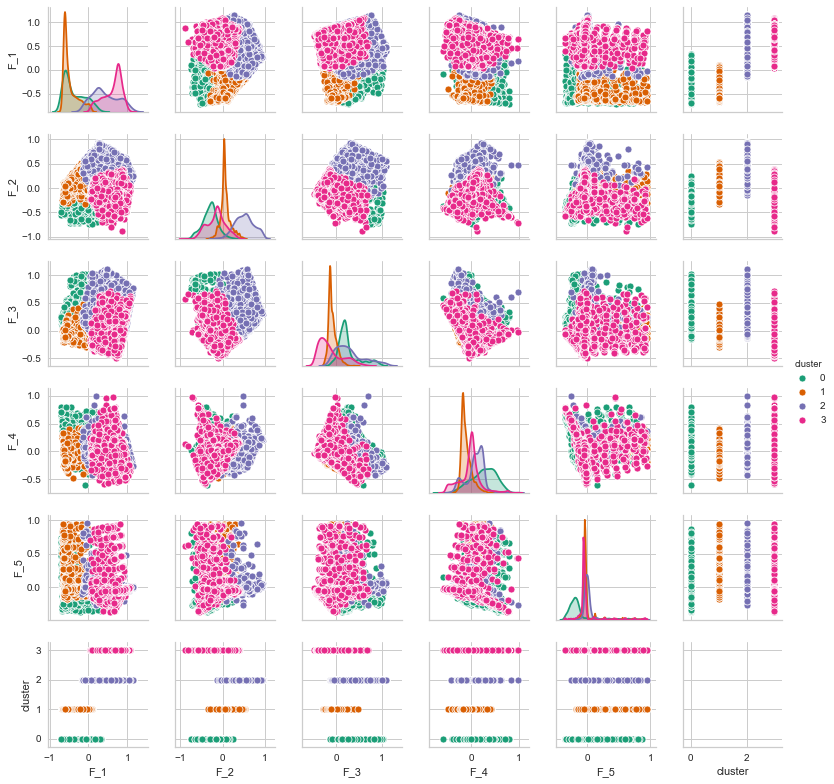

In [33]:
sns.pairplot(df_f,hue='cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

### Original data

In [34]:
df['cluster']=clusters

In [38]:
df_sc['cluster']=clusters

In [35]:
df.cluster.value_counts()

1    3127
3    2361
0    1102
2     948
Name: cluster, dtype: int64

In [37]:
df_sc

balance_account  purchases_amount  paid_advance  full_purchases  \
0            0.000488          0.002194      0.000000        0.000000   
1            0.002766          0.003065      0.000000        0.000000   
2            0.071459          0.000000      0.009819        0.000000   
3            0.106161          0.007406      0.000000        0.008910   
4            0.001172          0.001937      0.024652        0.002331   
...               ...               ...           ...             ...   
8495         0.059213          0.000000      0.005751        0.000000   
8496         0.001124          0.003053      0.000000        0.000000   
8497         0.000000          0.000000      0.005386        0.000000   
8498         0.086456          0.021357      0.003111        0.025695   
8499         0.097730          0.035727      0.000000        0.034768   

      balance_frequency_update  installments  purchases_frequency  \
0                     0.909091      0.004782             0.909091   
1                     1.000000      0.006680             1.000000   
2                     1.000000      0.000000             0.000000   
3                     1.000000      0.000000             1.000000   
4                     0.363636      0.000000             0.083333   
...                        ...           ...                  ...   
8495                  1.000000      0.000000             0.000000   
8496                  1.000000      0.006654             0.916667   
8497                  0.000000      0.000000             0.000000   
8498                  1.000000      0.000000             0.583333   
8499                  1.000000      0.014884             0.916667   

      full_purchases_frequency  purchases_installments_frequency  \
0                     0.000000                          0.818182   
1                     0.000000                          0.833333   
2                     0.000000                          0.000000   
3                     1.000000                          0.000000   
4                     0.083333                          0.000000   
...                        ...                               ...   
8495                  0.000000                          0.000000   
8496                  0.000000                          0.916667   
8497                  0.000000                          0.000000   
8498                  0.583333                          0.000000   
8499                  0.583333                          0.666667   

      cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
0                   0.000000           0.00000      0.027933      0.031720   
1                   0.000000           0.00000      0.016760      0.031720   
2                   0.181818           0.04878      0.000000      0.048414   
3                   0.000000           0.00000      0.036313      0.065109   
4                   0.111111           0.02439      0.002793      0.081803   
...                      ...               ...           ...           ...   
8495                0.055555           0.00813      0.000000      0.282137   
8496                0.000000           0.00000      0.030726      0.048414   
8497                0.074074           0.00813      0.000000      0.015025   
8498                0.111111           0.01626      0.142458      0.098497   
8499                0.000000           0.00000      0.089385      0.115192   

      fixed_rate_period  payments  min_payments  full_payment_prc  
0              0.833333  0.001772      0.001174          0.428571  
1              0.000000  0.001079      0.001085          0.000000  
2              0.833333  0.005974      0.005808          0.000000  
3              1.000000  0.013884      0.010416          0.000000  
4              1.000000  0.080720      0.000525          0.000000  
...                 ...       ...           ...               ...  
8495           1.000000  0.013059      0.003406          0.000000  
84

In [39]:
df2=df_sc.sort_values(by=['cluster'])

In [69]:

fig, ax = plt.subplots(figsize=(18,10))         # Sample figsize in inches
sns.heatmap(df2.drop(['cluster'],1), ax=ax)

In [168]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster

cluster4=df.groupby('cluster').apply(lambda x: x[df.columns].mean()).T
cluster4.columns=['C_1','C_2','C_3','C_4']
cluster4

C_1          C_2          C_3  \
balance_account                    137.205655  1924.549176  1230.991486   
purchases_amount                   302.408176   224.139642  1732.810865   
paid_advance                       422.251868  1191.870048   232.412414   
full_purchases                     192.896742   183.138916  1353.065854   
balance_frequency_update             0.380252     0.968088     0.970376   
installments                       109.760799    41.170090   379.745011   
purchases_frequency                  0.207557     0.123784     0.856493   
full_purchases_frequency             0.068748     0.075282     0.774666   
purchases_installments_frequency     0.130713     0.048013     0.375385   
cash_advance_frequency               0.045843     0.200671     0.048251   
nr_cash_advances                     1.006352     4.320755     0.916667   
nr_purchases                         3.312160     2.326831    27.702532   
credit_limit                      3638.523896  3842.923317  5294.227081   
fixed_rate_period                   11.415608    11.562840    11.832278   
payments                           982.160568  1182.482752  1669.203126   
min_payments                       191.286491   906.775936   472.946700   
full_payment_prc                     0.218384     0.020214     0.225677   
cluster                              0.000000     1.000000     2.000000   
limit_usage                          5.165130    57.526908    29.584437   
Monthly_avg_purchase                26.324487    19.446431   146.268368   
payment_minpay                      21.786760     2.662608     6.826050   
Monthly_cash_advance                38.601687   106.630667    19.627962   

                                          C_4  
balance_account                    904.934960  
purchases_amount                   941.773994  
paid_advance                       265.453848  
full_purchases                     244.482435  
balance_frequency_update             0.927408  
installments                       697.784265  
purchases_frequency                  0.882634  
full_purchases_frequency             0.101140  
purchases_installments_frequency     0.833613  
cash_advance_frequency               0.050880  
nr_cash_advances                     1.046167  
nr_purchases                        19.954680  
credit_limit                      3620.806006  
fixed_rate_period                   11.537061  
payments                          1115.592293  
min_payments                       713.664665  
full_payment_prc                     0.231167  
cluster                              3.000000  
limit_usage                         30.999054  
Monthly_avg_purchase                80.976018  
payment_minpay                      11.290615  
Monthly_cash_advance                23.395396

In [41]:
grouped=df.groupby('cluster').mean()

In [42]:
df.groupby('cluster').mean()

balance_account  purchases_amount  paid_advance  full_purchases  \
cluster                                                                    
0             137.205655        302.408176    422.251868      192.896742   
1            1924.549176        224.139642   1191.870048      183.138916   
2            1230.991486       1732.810865    232.412414     1353.065854   
3             904.934960        941.773994    265.453848      244.482435   

         balance_frequency_update  installments  purchases_frequency  \
cluster                                                                
0                        0.380252    109.760799             0.207557   
1                        0.968088     41.170090             0.123784   
2                        0.970376    379.745011             0.856493   
3                        0.927408    697.784265             0.882634   

         full_purchases_frequency  purchases_installments_frequency  \
cluster                                                               
0                        0.068748                          0.130713   
1                        0.075282                          0.048013   
2                        0.774666                          0.375385   
3                        0.101140                          0.833613   

         cash_advance_frequency  nr_cash_advances  nr_purchases  credit_limit  \
cluster                                                                         
0                      0.045843          1.006352      3.312160   3638.523896   
1                      0.200671          4.320755      2.326831   3842.923317   
2                      0.048251          0.916667     27.702532   5294.227081   
3                      0.050880          1.046167     19.954680   3620.806006   

         fixed_rate_period     payments  min_payments  full_payment_prc  
cluster                                                                  
0                11.415608   982.160568    191.286491          0.218384  
1                11.562840  1182.482752    906.775936          0.020214  
2                11.832278  1669.203126    472.946700          0.225677  
3                11.537061  1115.592293    713.664665          0.231167

In [43]:
df['cluster'].describe()

count    7538.000000
mean        1.605996
std         1.075978
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         3.000000
Name: cluster, dtype: float64

### Final Analysis

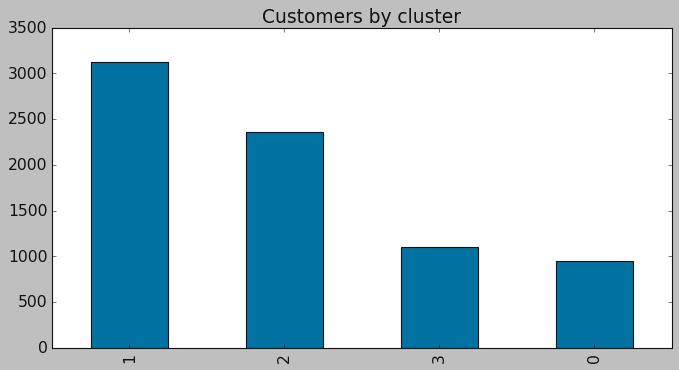

In [121]:
# Number of clients by cluster
df['cluster'].value_counts().plot.bar(figsize=(10,5), title='Customers by cluster');

df['cluster'].value_counts()
None

In [57]:
df.columns[0:6]

Index(['balance_account', 'purchases_amount', 'paid_advance', 'full_purchases',
       'balance_frequency_update', 'installments'],
      dtype='object')

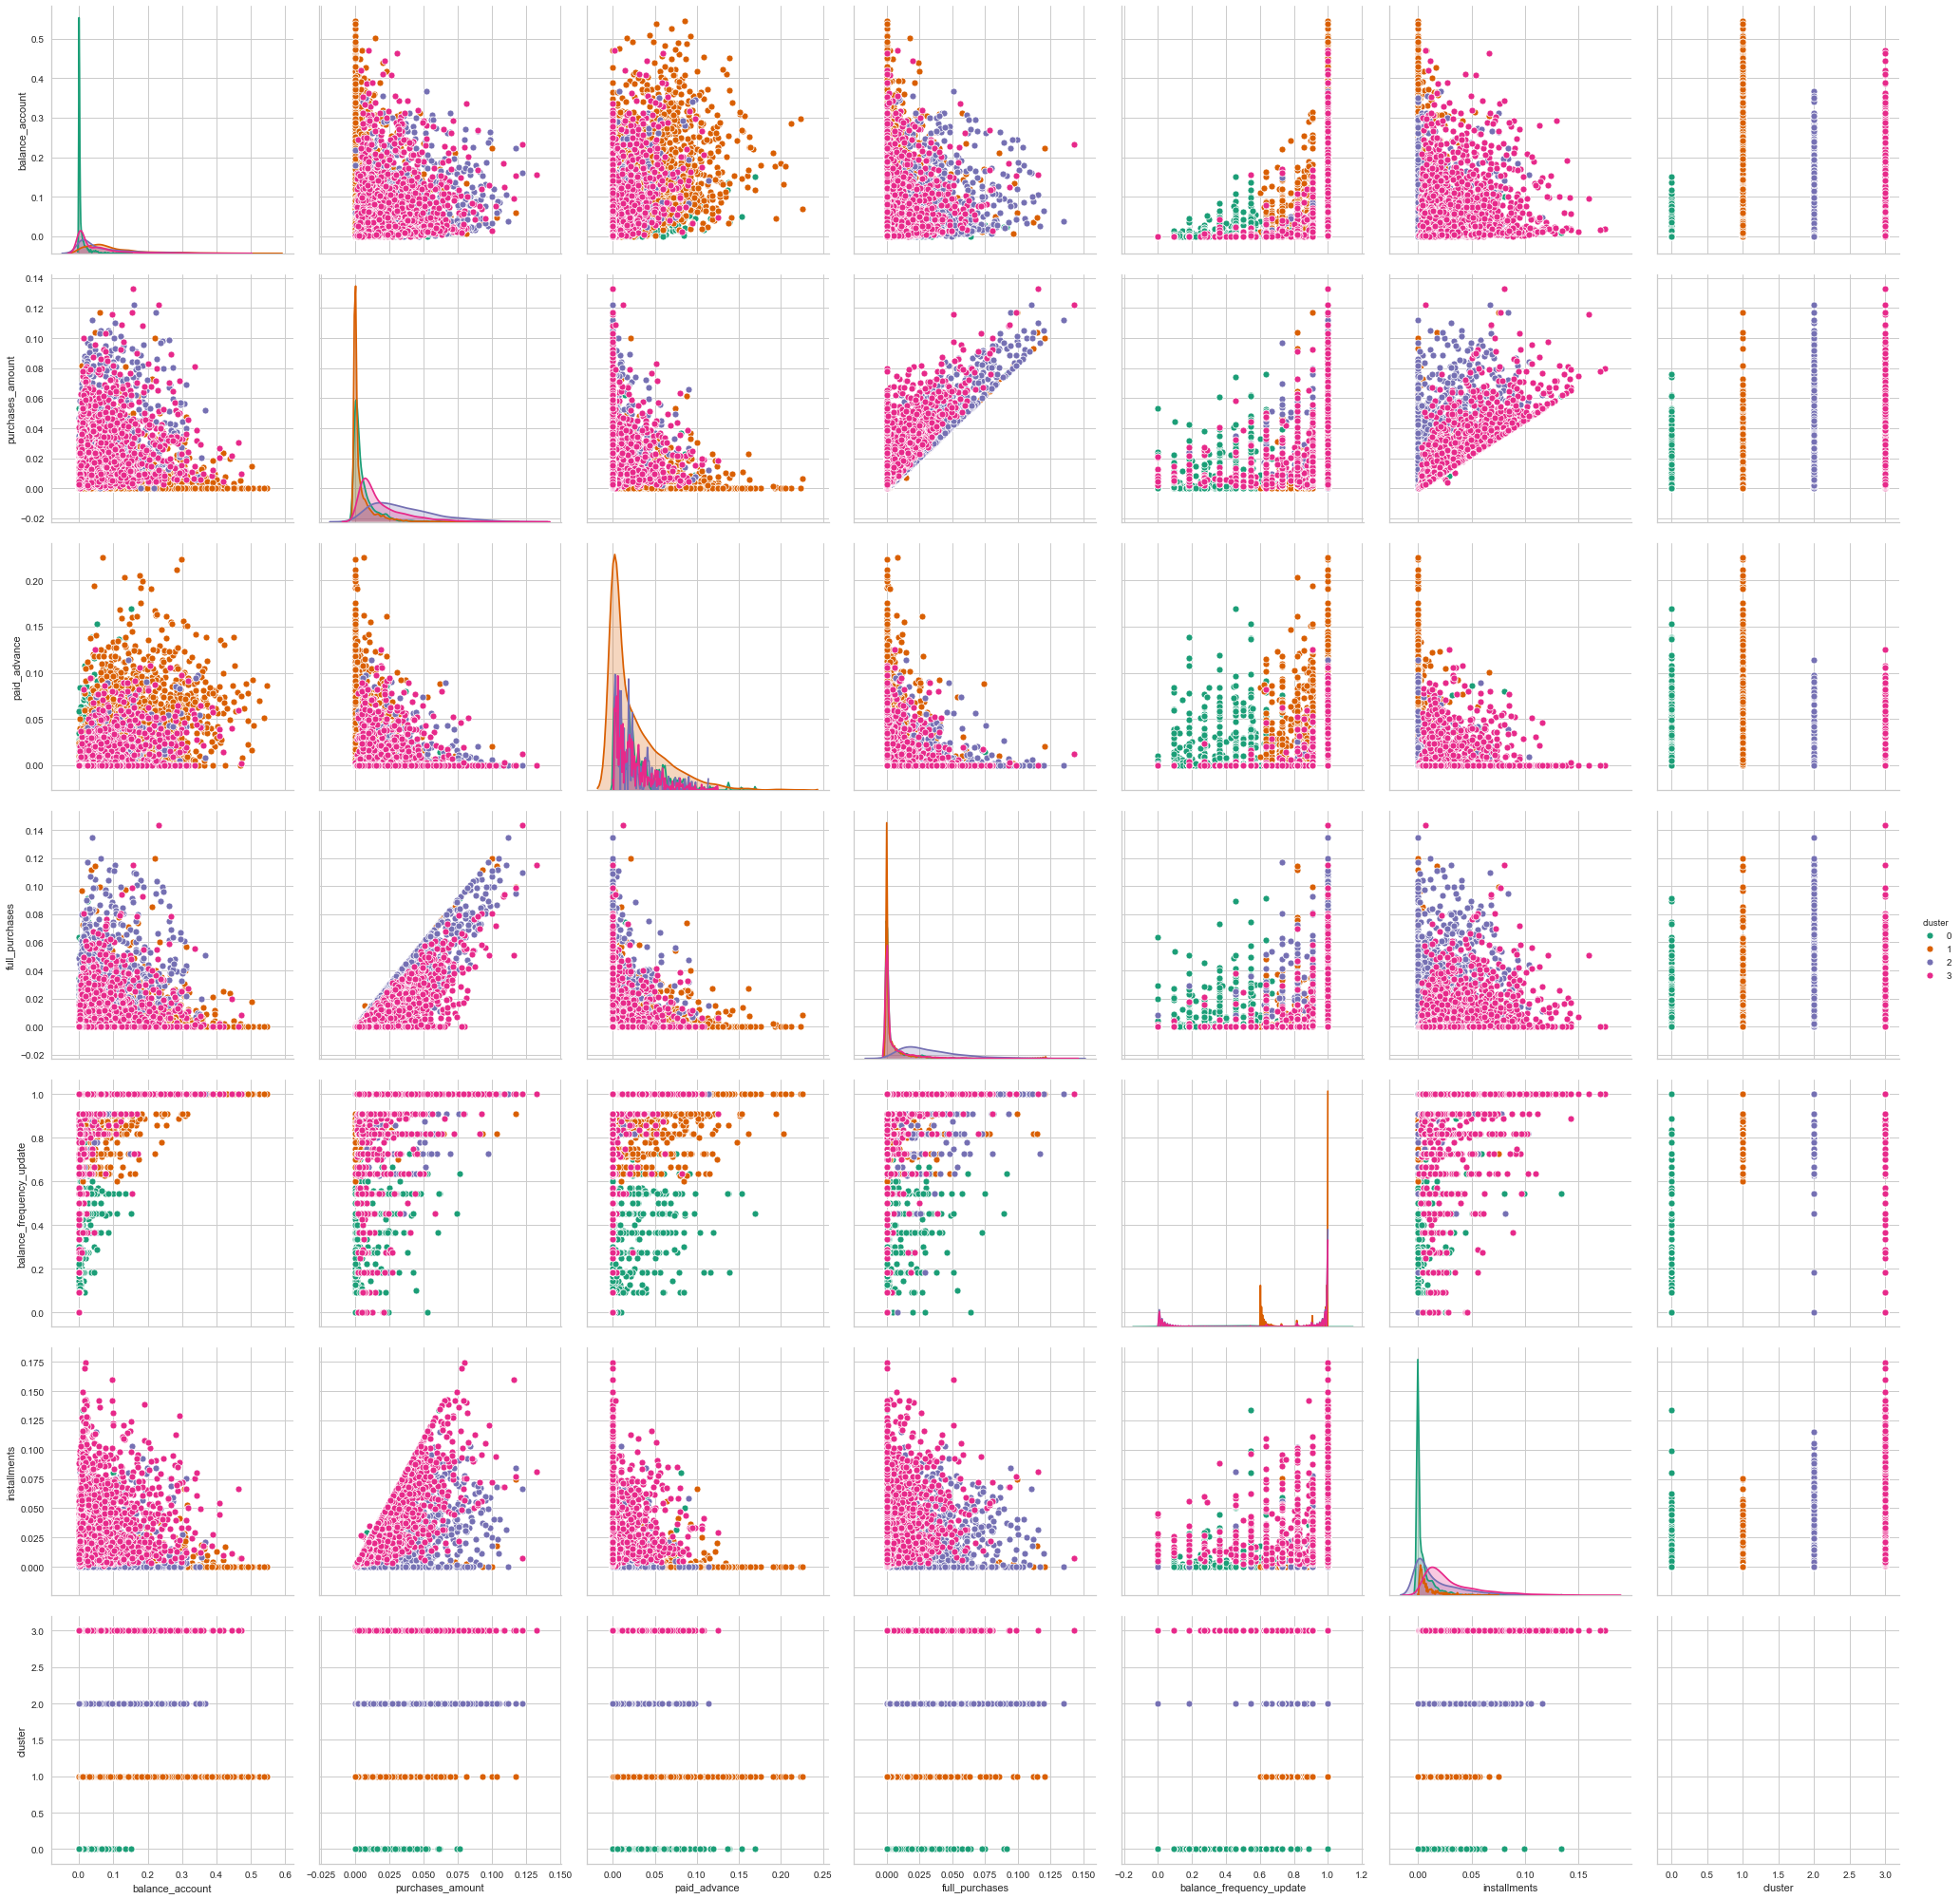

In [52]:
sns.pairplot(df_sc.iloc[:,[0,1,2,3,4,5,-1]],hue='cluster', palette= 'Dark2', diag_kind='kde',size=4)
None

In [58]:
df.columns[7:11]

Index(['full_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'nr_cash_advances'],
      dtype='object')

In [53]:
sns.pairplot(df_sc.iloc[:,[6,7,8,9,10,11,-1]],hue='cluster', palette= 'Dark2', diag_kind='kde',size=4)
None

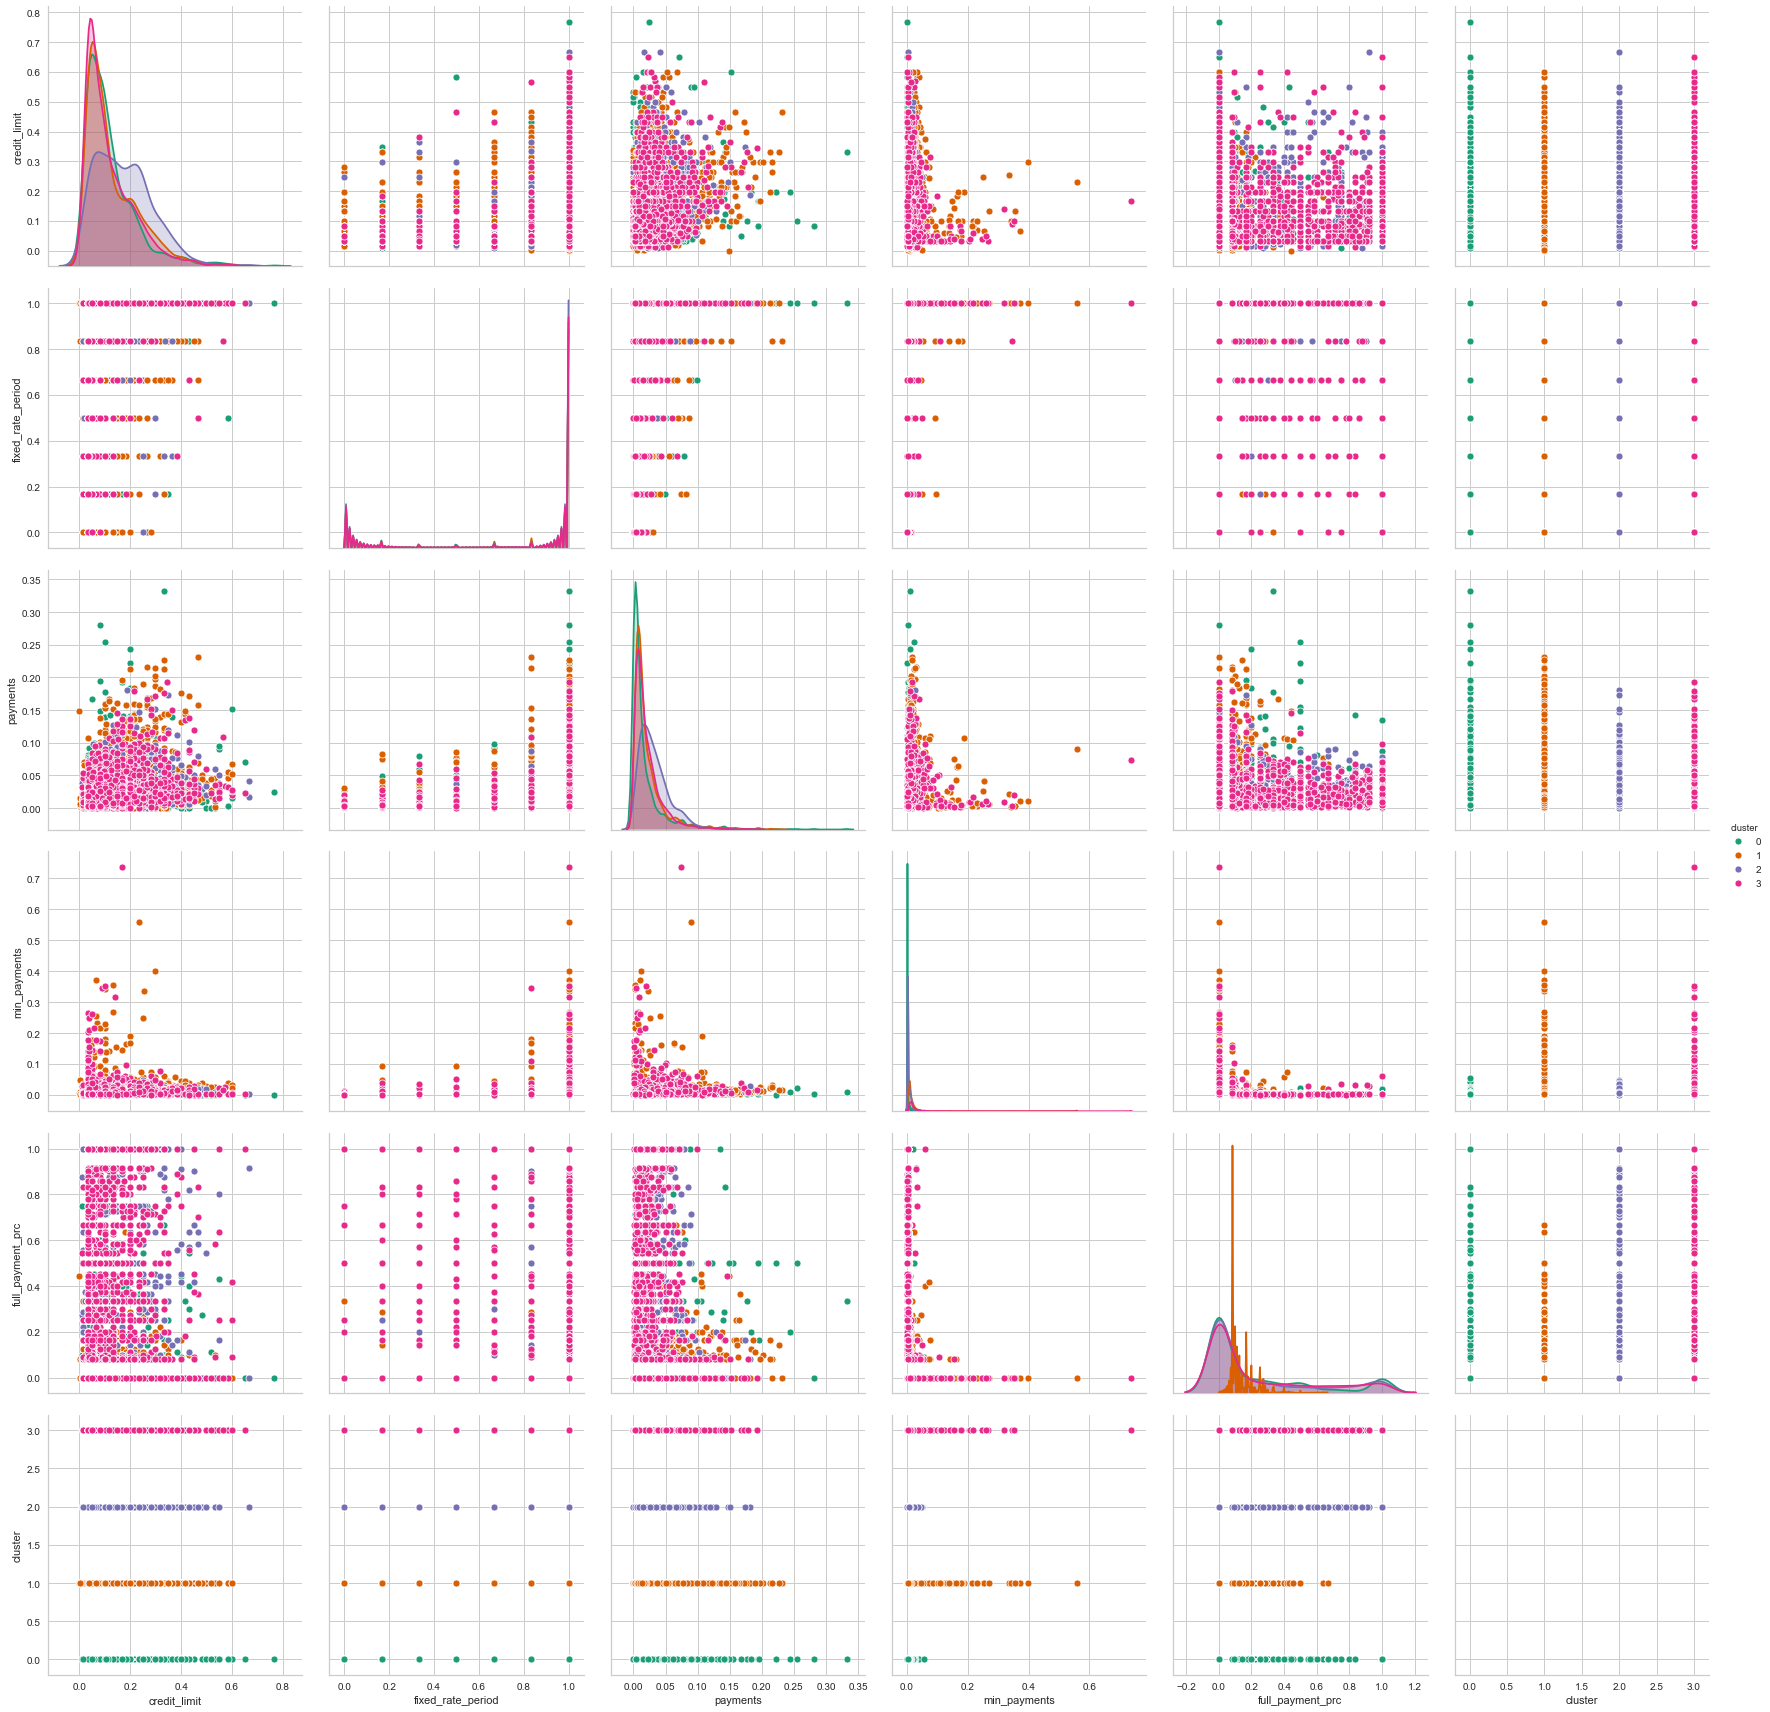

In [56]:
sns.pairplot(df_sc.iloc[:,[12,13,14,15,16,17]],hue='cluster', palette= 'Dark2', diag_kind='kde',size=4)
None

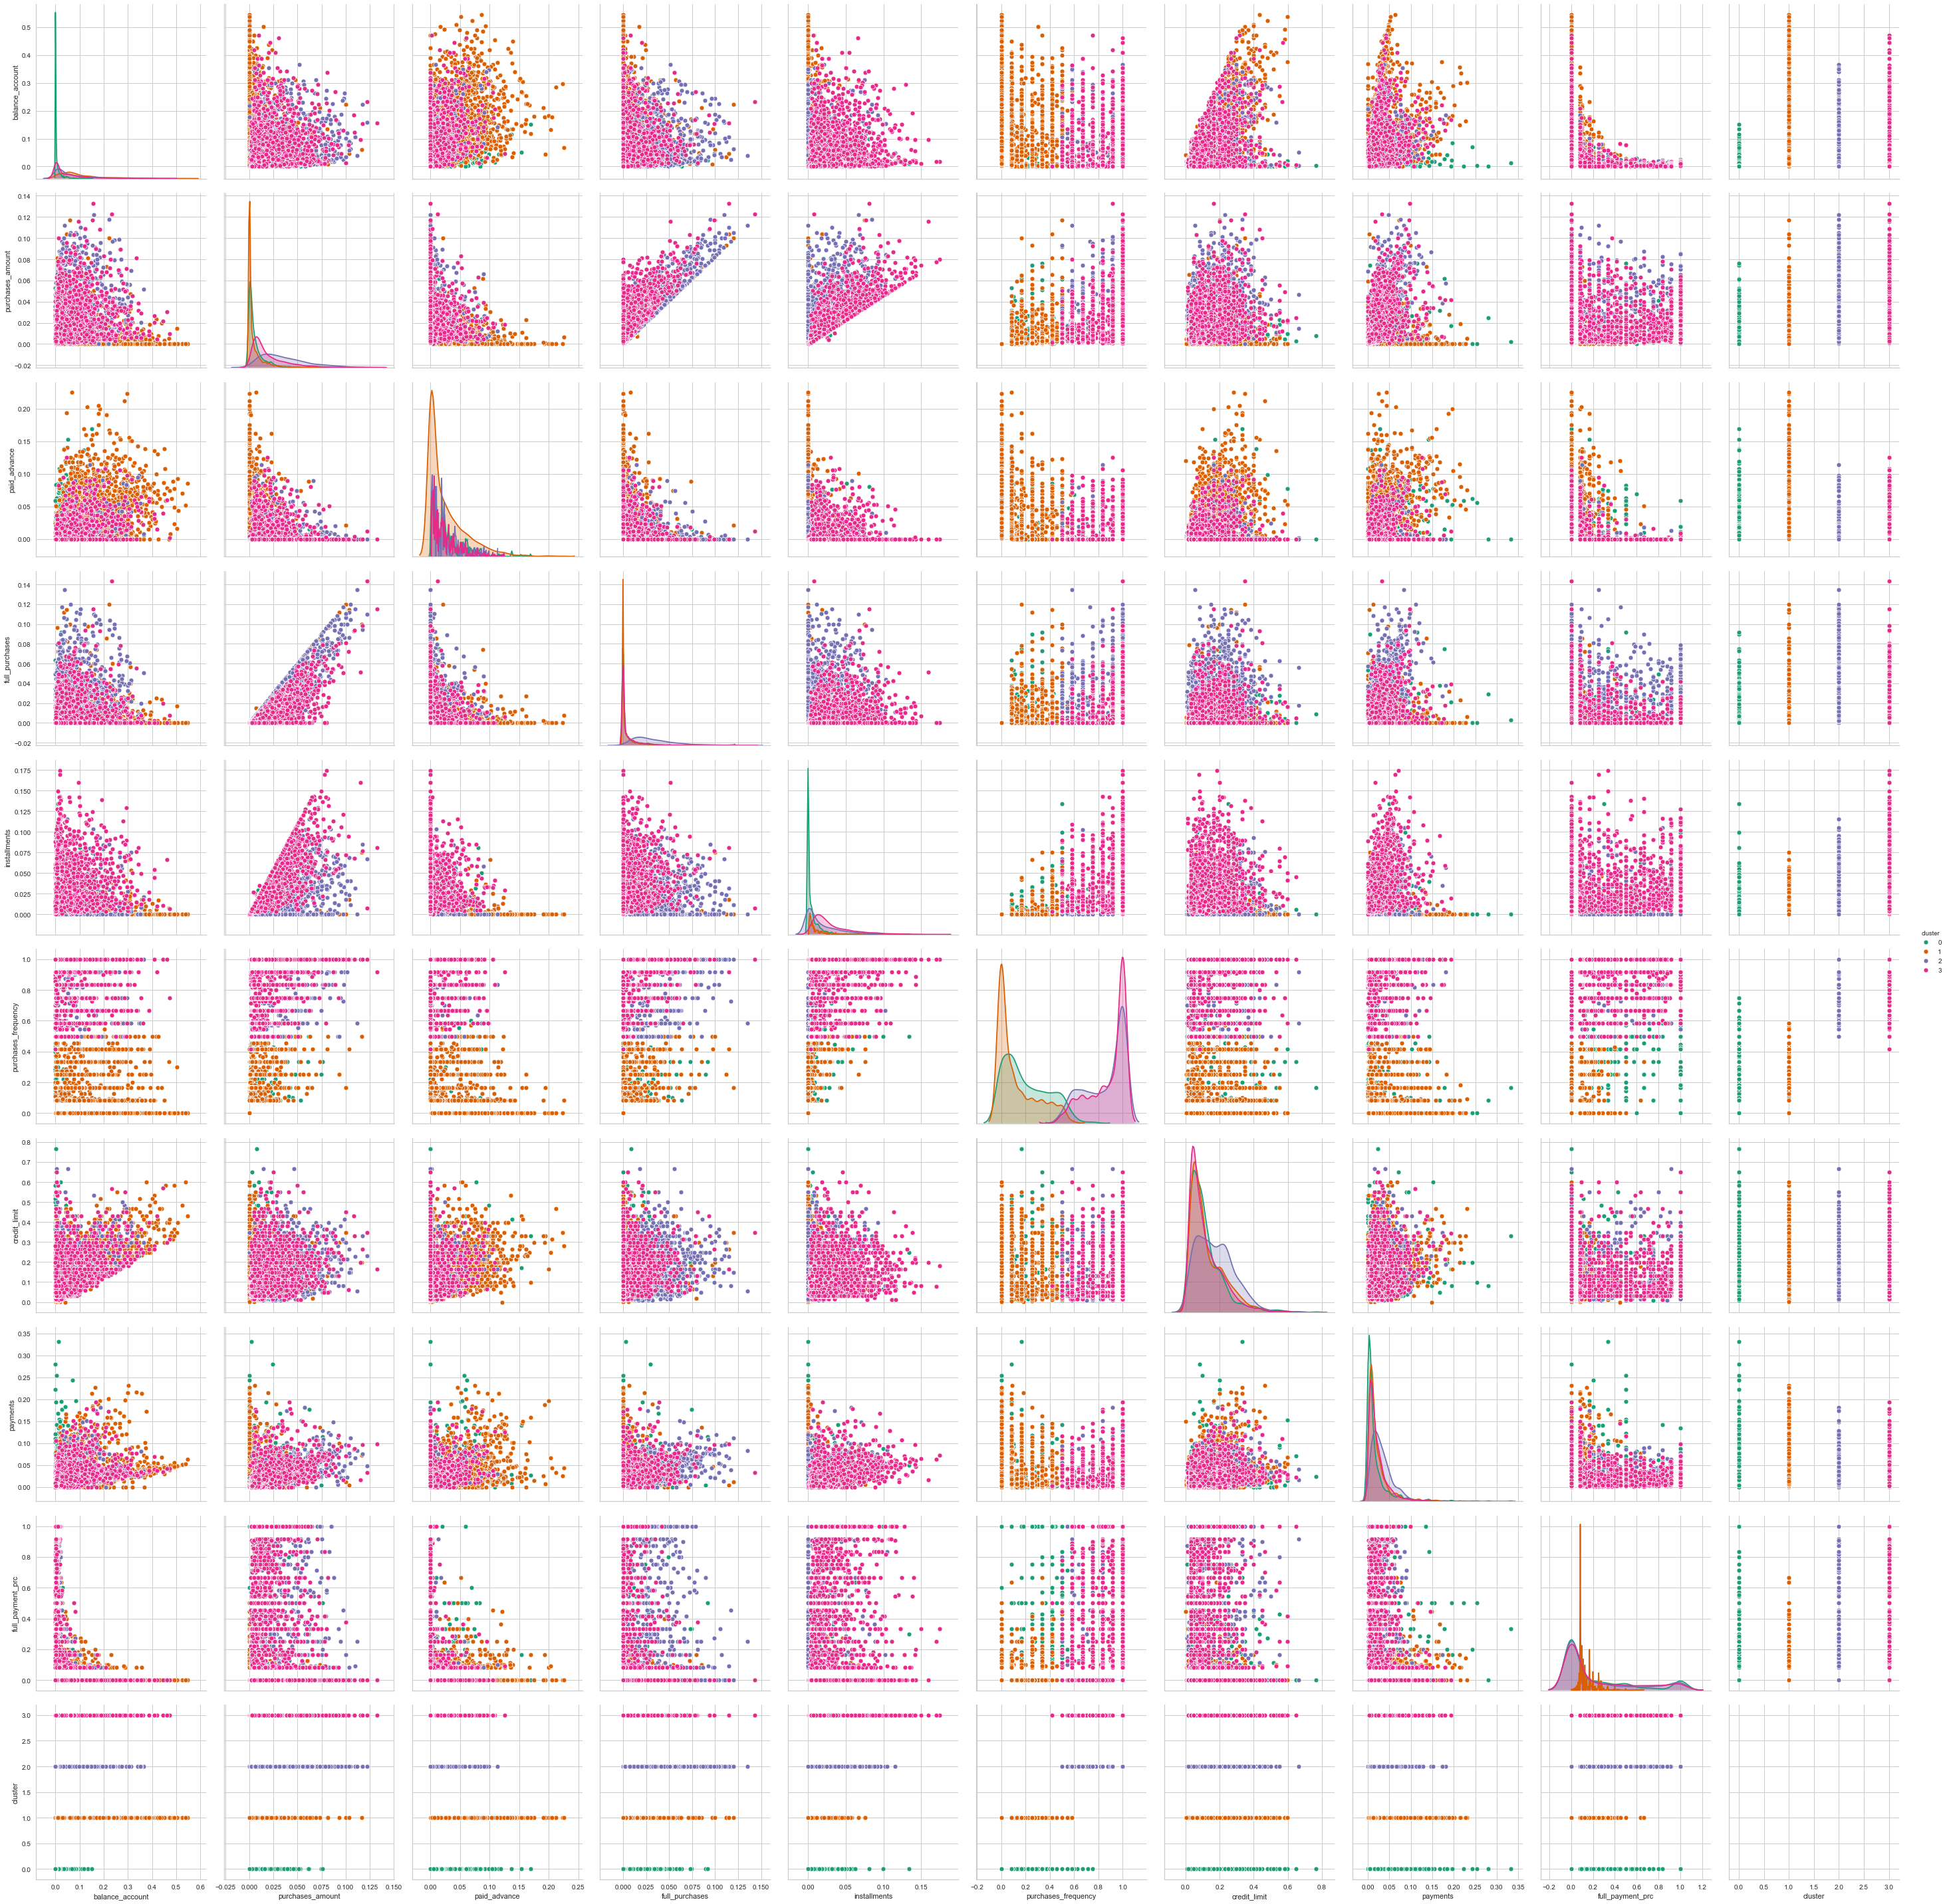

In [77]:
sns.pairplot(df_sc.iloc[:,[0,1,2,3,5,6,12,14,16,17]],hue='cluster', palette= 'Dark2', diag_kind='kde',size=4)
None

In [155]:
cluster4

C_1          C_2          C_3  \
balance_account                    137.205655  1924.549176  1230.991486   
purchases_amount                   302.408176   224.139642  1732.810865   
paid_advance                       422.251868  1191.870048   232.412414   
full_purchases                     192.896742   183.138916  1353.065854   
balance_frequency_update             0.380252     0.968088     0.970376   
installments                       109.760799    41.170090   379.745011   
purchases_frequency                  0.207557     0.123784     0.856493   
full_purchases_frequency             0.068748     0.075282     0.774666   
purchases_installments_frequency     0.130713     0.048013     0.375385   
cash_advance_frequency               0.045843     0.200671     0.048251   
nr_cash_advances                     1.006352     4.320755     0.916667   
nr_purchases                         3.312160     2.326831    27.702532   
credit_limit                      3638.523896  3842.923317  5294.227081   
fixed_rate_period                   11.415608    11.562840    11.832278   
payments                           982.160568  1182.482752  1669.203126   
min_payments                       191.286491   906.775936   472.946700   
full_payment_prc                     0.218384     0.020214     0.225677   
cluster                              0.000000     1.000000     2.000000   
limit_usage                          0.051651     0.575269     0.295844   

                                          C_4  
balance_account                    904.934960  
purchases_amount                   941.773994  
paid_advance                       265.453848  
full_purchases                     244.482435  
balance_frequency_update             0.927408  
installments                       697.784265  
purchases_frequency                  0.882634  
full_purchases_frequency             0.101140  
purchases_installments_frequency     0.833613  
cash_advance_frequency               0.050880  
nr_cash_advances                     1.046167  
nr_purchases                        19.954680  
credit_limit                      3620.806006  
fixed_rate_period                   11.537061  
payments                          1115.592293  
min_payments                       713.664665  
full_payment_prc                     0.231167  
cluster                              3.000000  
limit_usage                          0.309991

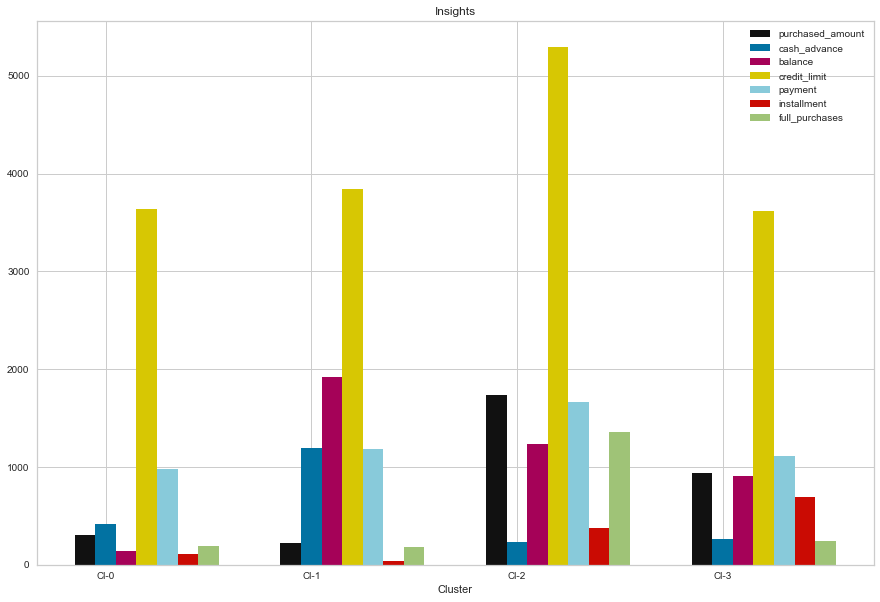

In [159]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster4.columns))

purchase_amount= cluster4.loc['purchases_amount',:].values
cash_advance= cluster4.loc['paid_advance',:].values
balance=cluster4.loc['balance_account',:].values
credit= cluster4.loc['credit_limit',:].values
payment=cluster4.loc['payments',:].values
installment=cluster4.loc['installments',:].values
full_purchases=cluster4.loc['full_purchases',:].values

bar_width=.10
b1=plt.bar(index,purchase_amount,color='k',label='purchased_amount',width=bar_width)
b2=plt.bar(index+bar_width,cash_advance,color='b',label='cash_advance',width=bar_width)
b3=plt.bar(index+2*bar_width,balance,color='m',label='balance',width=bar_width)
b4=plt.bar(index+3*bar_width,credit,color='y',label='credit_limit',width=bar_width)
b5=plt.bar(index+4*bar_width,payment,color='c',label='payment',width=bar_width)
b6=plt.bar(index+5*bar_width,installment,color='r',label='installment',width=bar_width)
b7=plt.bar(index+6*bar_width,full_purchases,color='g',label='full_purchases',width=bar_width)


plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

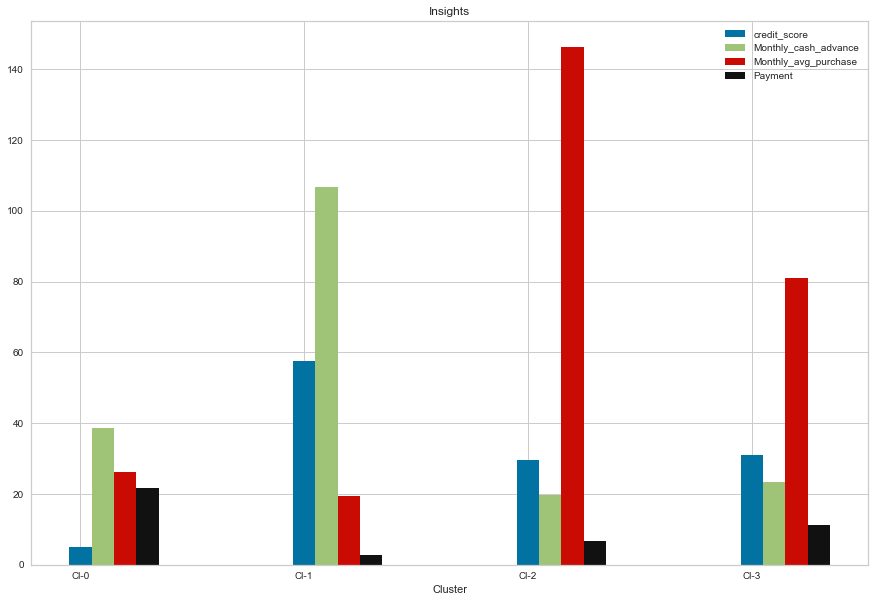

In [171]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster4.columns))


credit_score=cluster4.loc['limit_usage',:].values
Monthly_cash_advance=cluster4.loc['Monthly_cash_advance',:].values
Monthly_avg_purchase=cluster4.loc['Monthly_avg_purchase',:].values
payment_minpay=cluster4.loc['payment_minpay',:].values

bar_width=.10

b1=plt.bar(index+1*bar_width,credit_score,color='b',label='credit_score',width=bar_width)
b2=plt.bar(index+2*bar_width,Monthly_cash_advance,color='g',label='Monthly_cash_advance',width=bar_width)
b3=plt.bar(index+3*bar_width,Monthly_avg_purchase,color='r',label='Monthly_avg_purchase',width=bar_width)
b4=plt.bar(index+4*bar_width,payment_minpay,color='k',label='Payment',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

In [80]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3D(data_3D, labels=None, **kwargs):
    fig_ = plt.figure(figsize=(10,8))
    ax = Axes3D(fig_)
    ax.scatter(data_3D.iloc[:, 0], data_3D.iloc[:, 1], data_3D.iloc[:, 2], c=labels, **kwargs) 
    return ax

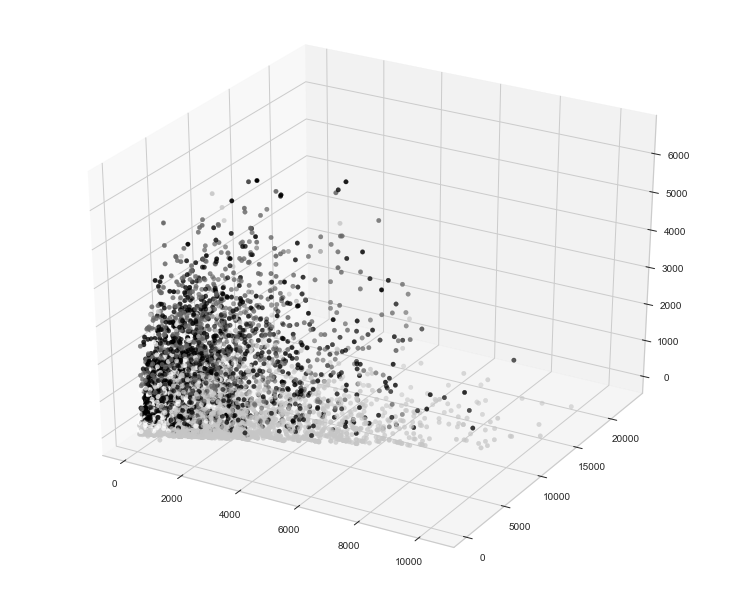

In [81]:
cols = ['balance_account', 'credit_limit', 'purchases_amount']
plot_3D(df[cols], labels=df.cluster)
None

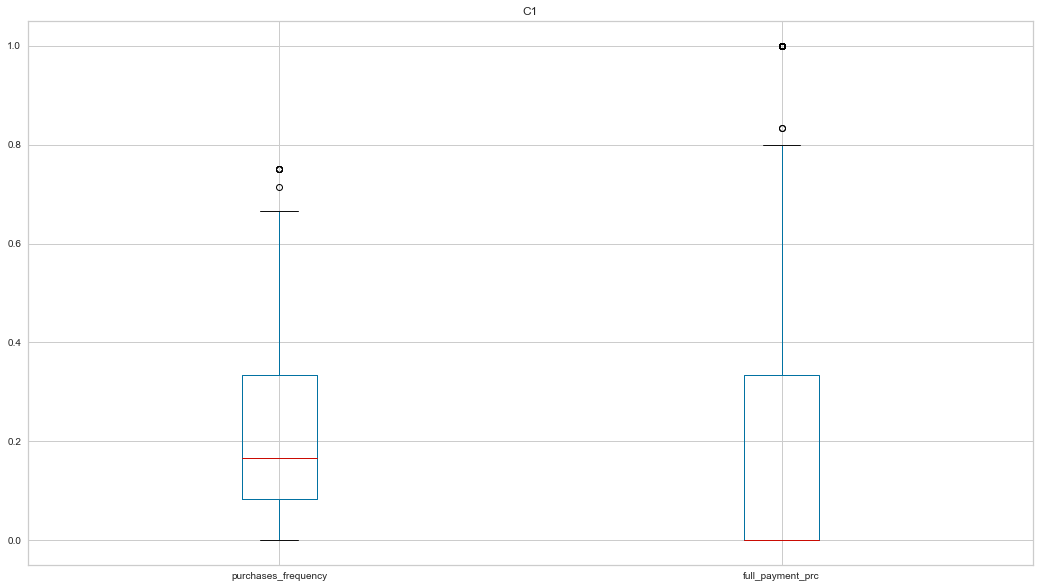

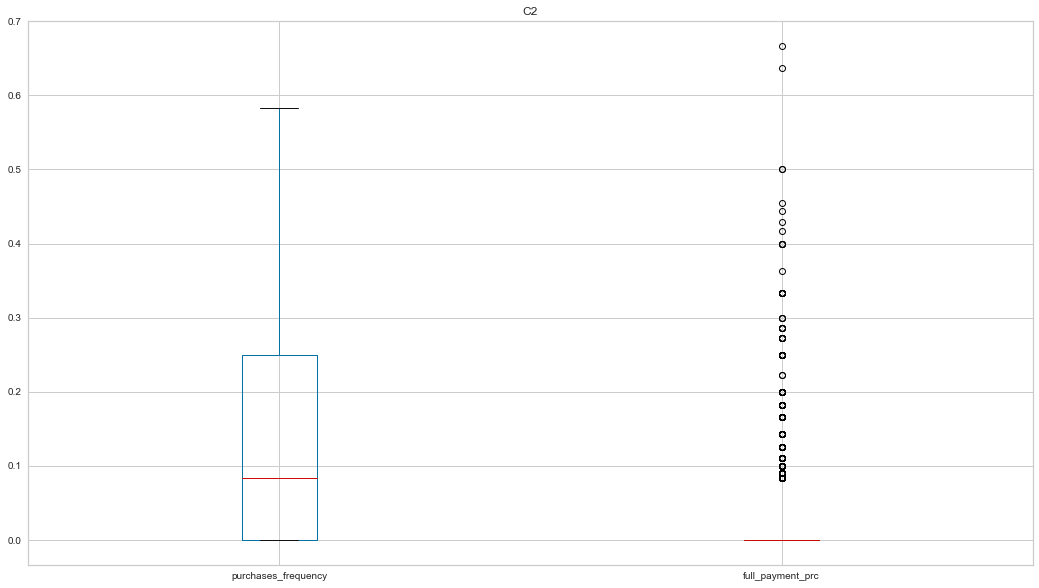

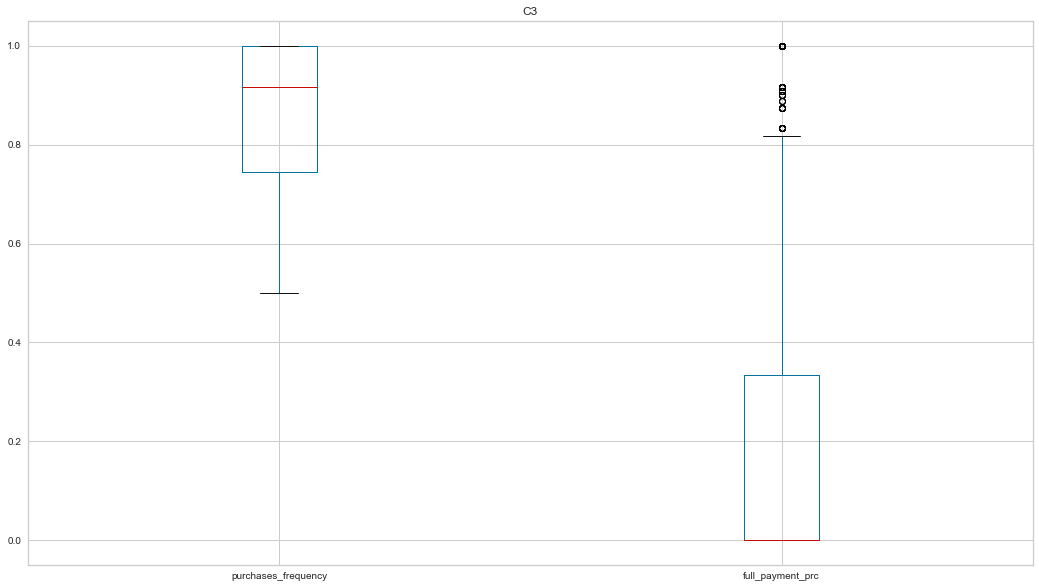

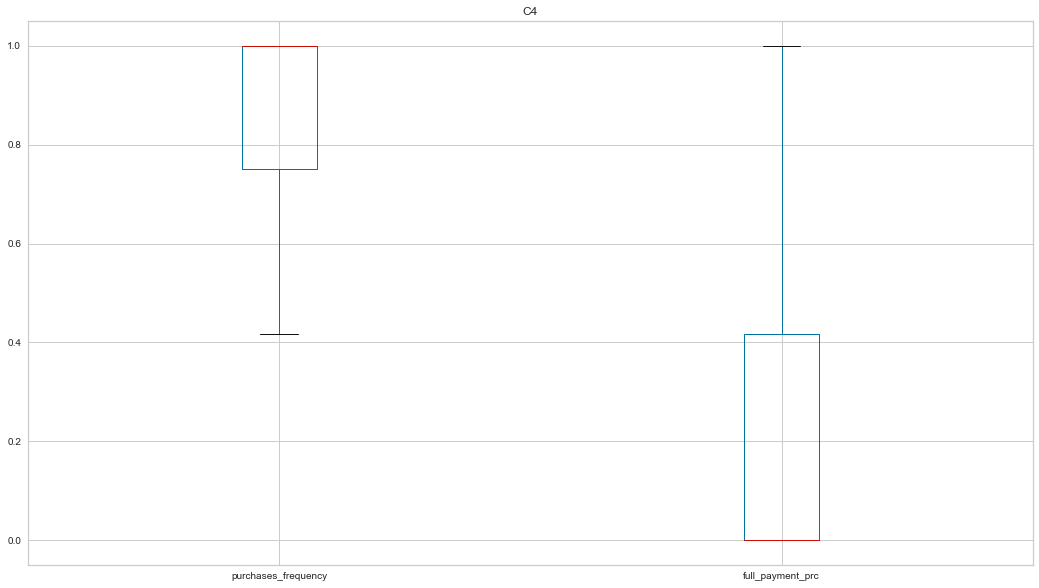

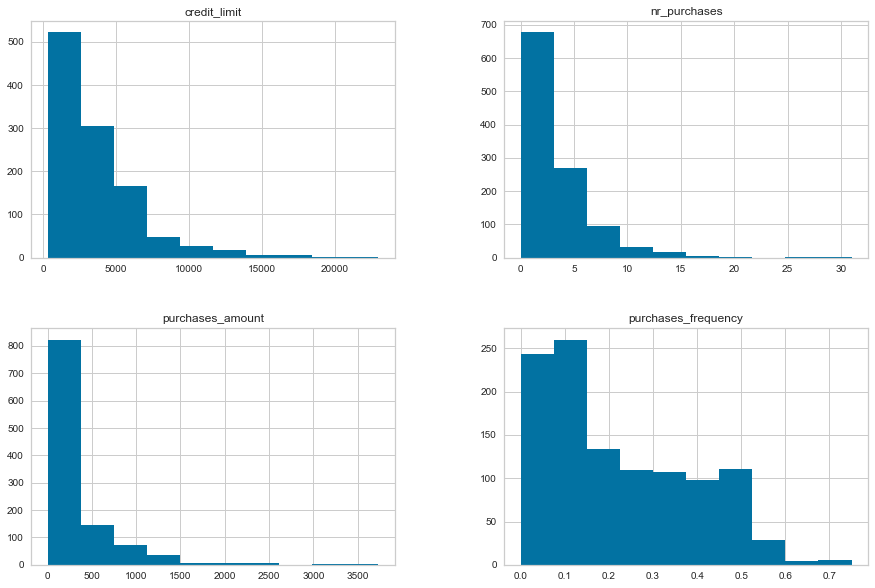

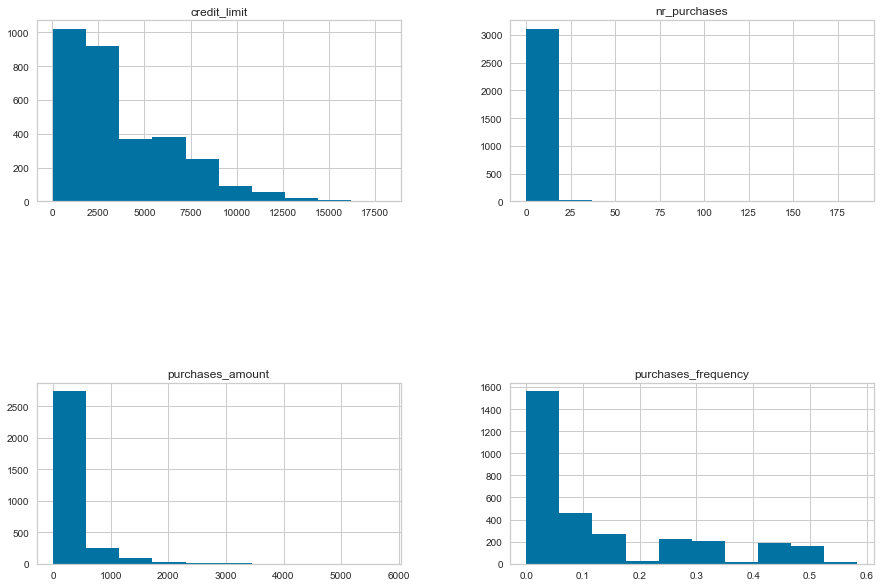

In [89]:
#let´s characterize the Persona in the Cluster C1credit_limit
cluster_C1=df[df['cluster']==0]
cluster_C2=df[df['cluster']==1]
cluster_C3=df[df['cluster']==2]
cluster_C4=df[df['cluster']==3]
cluster_C1[['purchases_frequency','full_payment_prc']].plot.box(figsize=(18,10),by='cluster',title='C1',legend=True);
cluster_C2[['purchases_frequency','full_payment_prc']].plot.box(figsize=(18,10),by='cluster',title='C2',legend=True);
cluster_C3[['purchases_frequency','full_payment_prc']].plot.box(figsize=(18,10),by='cluster',title='C3',legend=True);
cluster_C4[['purchases_frequency','full_payment_prc']].plot.box(figsize=(18,10),by='cluster',title='C4',legend=True);
plt.subplots_adjust(hspace=1) 
plt.subplots_adjust(hspace=1) 
#cluster_C1[['credit_limit','purchases_amount','nr_purchases','purchases_frequency']].plot.hist(figsize=(18,10),title='Persona C1',legend=True);
cluster_C1[['purchases_frequency','purchases_amount','nr_purchases','credit_limit']].hist(figsize = (15,10))
cluster_C2[['purchases_frequency','purchases_amount','nr_purchases','credit_limit']].hist(figsize = (15,10))

plt.subplots_adjust(hspace=1) 
plt.show()




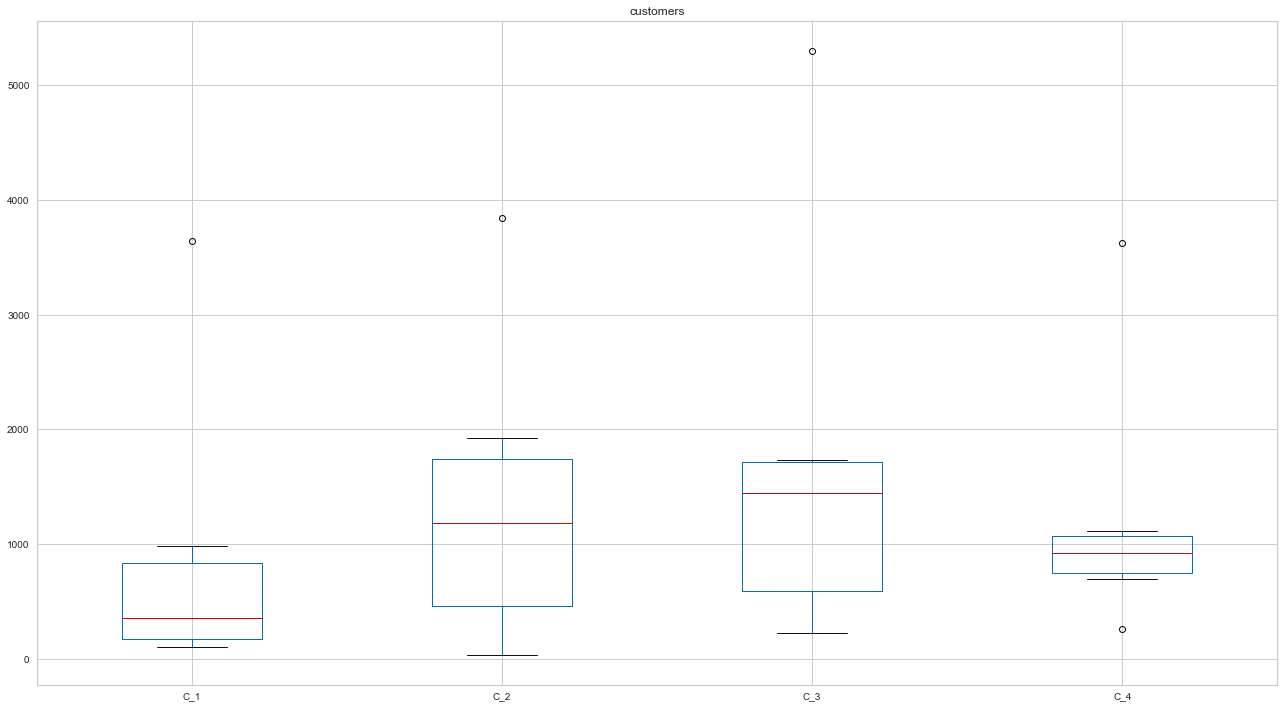

In [113]:

cluster4.loc[['balance_account','paid_advance','installments','purchases_amount',
            'credit_limit','payments']].plot.box(figsize=(18,10),by='cluster',title='customers',legend=True);
plt.tight_layout()


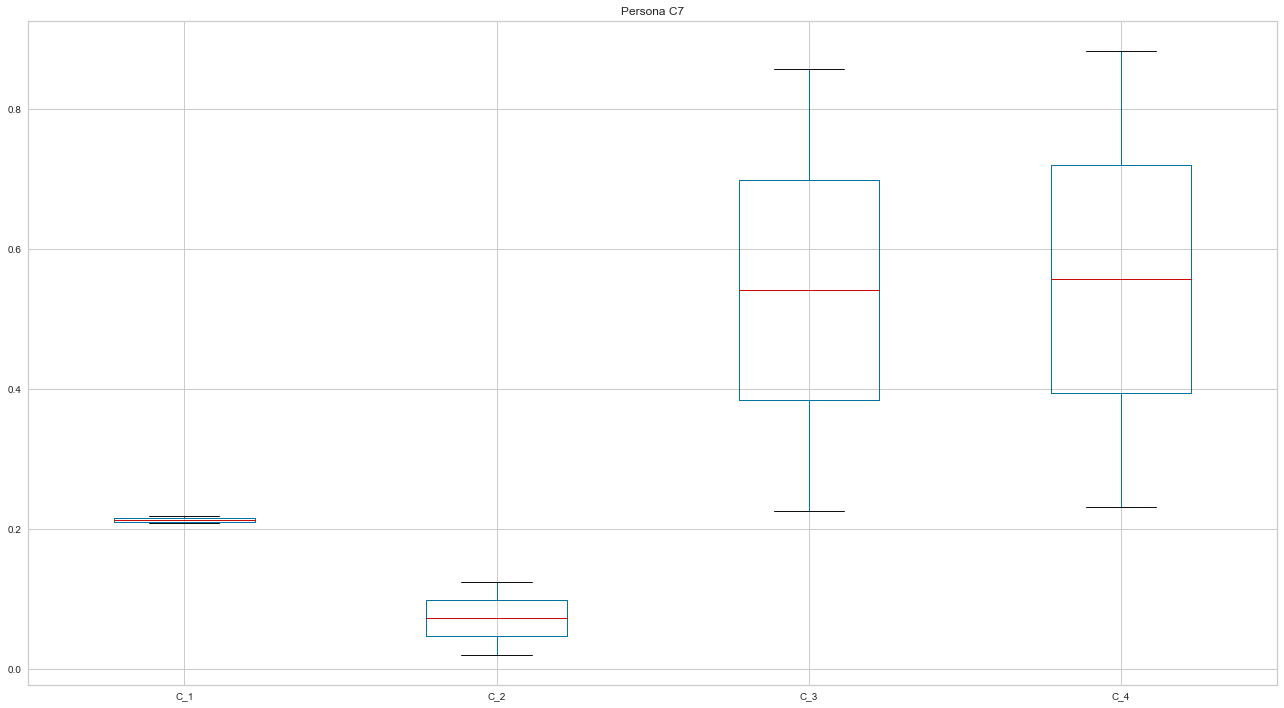

In [111]:
cluster4.loc[['purchases_frequency','full_payment_prc']].plot.box(figsize=(18,10),by='cluster',title='Persona C7',legend=True);
plt.tight_layout()



### Cluster error

In [140]:
#Identify cluster Error.

cluster_range = range( 1, 21 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(features)
    cluster_errors.append( clusters.inertia_ )# clusters.inertia_ is basically cluster error here.

In [141]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:21]

num_clusters  cluster_errors
0              1     3271.466779
1              2     1652.329258
2              3     1314.847264
3              4     1017.163468
4              5      808.561362
5              6      680.360781
6              7      582.575928
7              8      517.543367
8              9      463.097426
9             10      420.442561
10            11      385.425824
11            12      359.731587
12            13      337.640506
13            14      317.136734
14            15      298.638532
15            16      282.108871
16            17      265.323545
17            18      256.278273
18            19      246.027000
19            20      233.814887

### Conclusion

In [161]:
df_f.cluster.value_counts()/len(df_f.cluster)*100

1    41.483152
3    31.321305
0    14.619262
2    12.576280
Name: cluster, dtype: float64

Cluster 0
customers are doing min full transactions, least payment and credit limit, min credit score. This group is about 14% of the total customer base. Risky group

Cluster 1 
taking maximum cash advance and paying less, poor purchase transaction, no installment, max credit crore. This group is about 41% of the total customer base.
Provide lower interest rate on purchasing.

Cluster 2 
customers have highest purchases and doing both installment as well as full purchases, have comparatively good credit limit and balance amount. This group is about 12% of the total customer base. Loyality cards, increase credit limit.

Cluster 3 
customers are doing maximum installment purchases, min full payment, low cash advance. This group is about 31% of the total customer base.Give loyality cards.

In [156]:
df['limit_usage']=df.apply(lambda x: x['balance_account']/x['credit_limit']*100, axis=1)

In [157]:
df['limit_usage']

0         0.929841
1         5.266642
2        90.719712
3       101.082058
4         0.892895
           ...    
8495     13.265972
8496      1.427322
8497      0.000000
8498     54.879484
8499     53.173925
Name: limit_usage, Length: 7538, dtype: float64

In [163]:

df['Monthly_avg_purchase']=df['purchases_amount']/df['fixed_rate_period']

In [165]:
df['payment_minpay']=df.apply(lambda x:x['payments']/x['min_payments'],axis=1)

In [167]:

df['Monthly_cash_advance']=df['paid_advance']/df['fixed_rate_period']